In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
easyshare = pd.read_stata('/Users/armandeaboudrar-meda/Desktop/sharewX_rel8-0-0_easySHARE_stata.dta/easySHARE_rel8-0-0.dta')

illness_before = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/illness_before_module_v01.dta")
illness_during = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/illness_during_module_v01.dta")
job = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/job_module_v01.dta")
life = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/life_module_v01.dta")
young_age = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/young_age_module_v01.dta")
yearly = pd.read_stata("/Users/armandeaboudrar-meda/Desktop/SHARE-ENV-ExposuretoEnvironmentalHazards/yearly_module_v01.dta")
# individual_year = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/individual_year_panel_v01.dta")  NB times out, I ran it for 2+hrs

df = pd.merge(easyshare, life, on=['mergeid', 'wave'], how='left')

#merged.to_pickle("data/df_merged.pkl")


In [10]:
df.describe()

,wave,wavepart,thinc_m,CDD_w,HDD_w,avg_conc_no2_mean,avg_conc_no2_median,avg_conc_pm10_mean,avg_conc_pm10_median,avg_conc_pm10_w,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
count,412110.000000,4.121100e+05,4.121100e+05,247129.000000,247129.000000,292308.000000,292308.000000,292308.000000,292308.000000,292330.000000,...,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,2.471290e+05,247129.000000,247129.000000
mean,5.035566,9.878451e+05,8.085985e+05,94.902377,2596.399453,8.706448,8.741836,19.625999,19.680202,20.533115,...,20.089201,24.628500,27.599796,22.380423,8.054352,3.336129,1.804966,3.452446e+02,7.374281,344.103359
std,2.084000,3.082496e+06,8.591955e+07,128.238707,924.667334,4.113612,4.223463,7.740768,7.827614,8.009251,...,12.919192,12.961825,11.654469,22.909336,7.873321,4.334066,4.329890,2.278218e-13,6.692278,4.119086
min,1.000000,1.000000e+00,-9.972739e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.452446e+02,-9.596973,328.414221
25%,4.000000,7.800000e+01,1.027684e+03,8.004644,2011.427361,5.823186,5.824138,14.328774,14.446408,15.433441,...,8.858876,16.532478,21.304916,4.366660,0.662412,0.023839,0.000000,3.452446e+02,1.995656,345.244644
50%,5.000000,4.567000e+03,1.582463e+04,34.827944,2783.924889,8.341747,8.352927,19.762360,19.834177,20.298185,...,22.411585,27.590120,28.420017,13.743146,5.847452,1.070523,0.031710,3.452446e+02,6.422247,345.244644
75%,7.000000,4.567800e+04,3.137558e+04,138.272718,3192.298788,11.386459,11.388282,24.509069,24.615608,25.254732,...,29.275328,32.789524,35.428135,36.778969,13.796133,6.220437,1.781571,3.452446e+02,12.631802,345.244644
max,8.000000,1.234568e+07,9.592648e+09,607.820175,5830.370983,20.133627,20.981754,49.492981,51.762325,55.629631,...,67.147392,63.949547,65.836136,131.609512,44.050232,28.332399,47.900356,3.452446e+02,25.564817,345.244644


In [11]:
df.columns

Index(['mergeid', 'hhid', 'coupleid', 'wave', 'wavepart', 'int_version',
       'int_year', 'int_month', 'country', 'country_mod',
       ...
       'tx_2p5_5_w', 'tx_5_7p5_w', 'tx_7p5_10_w', 'tx_g30_w', 'tx_neg2p5_0_w',
       'tx_neg5_neg2p5_w', 'tx_neg5_w', 'warm_o3_w', 'winter_w',
       'yearly_o3_w'],
      dtype='object', length=332)

In [12]:
df.isna().sum()

mergeid                  0
hhid                     0
coupleid                 0
wave                     0
wavepart                 0
                     ...  
tx_neg5_neg2p5_w    164998
tx_neg5_w           164998
warm_o3_w           164981
winter_w            164981
yearly_o3_w         164981
Length: 332, dtype: int64

In [13]:
shape_of_dataframe = df.shape

print(f"No. of samples: {shape_of_dataframe[0]}")
print(f"No. of columns: {shape_of_dataframe[1]}")

No. of samples: 412110
No. of columns: 332


In [14]:
df.head()

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
0,AT-000327-01,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-000327-02,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
4,AT-000674-01,AT-000674-A,,4,456,0. Baseline questionnaire,2011,11. November,11. Austria,40. Austria,...,28.303789,27.970161,24.312283,12.823309,15.045419,7.444062,0.418507,345.244644,-0.185899,345.244644


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412110 entries, 0 to 412109
Columns: 332 entries, mergeid to yearly_o3_w
dtypes: category(102), float32(202), float64(21), int32(1), int8(1), object(5)
memory usage: 444.0+ MB


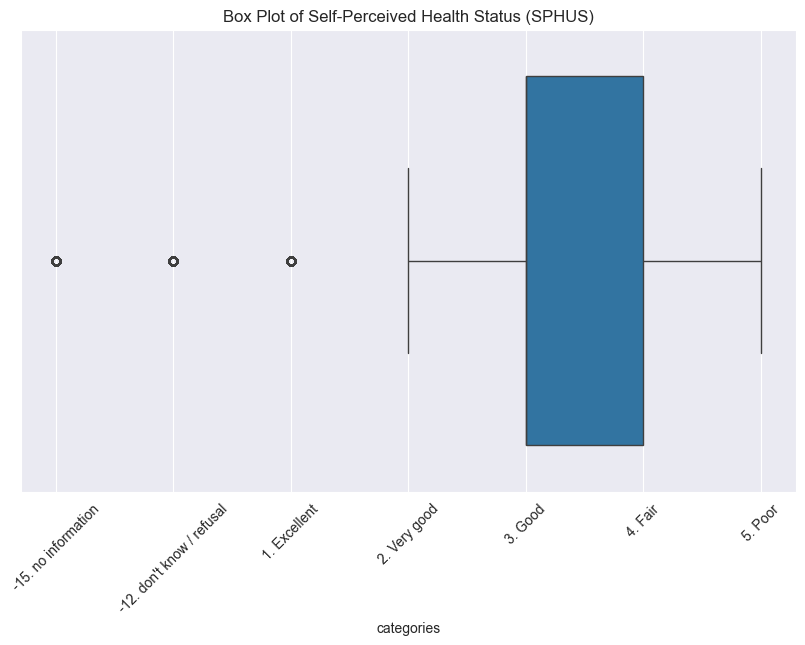

In [16]:
# box plot - doesn't make sense to do boxplot??
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sphus'])
plt.title('Box Plot of Self-Perceived Health Status (SPHUS)')
plt.xlabel('categories')
plt.xticks(rotation=45)
plt.show()

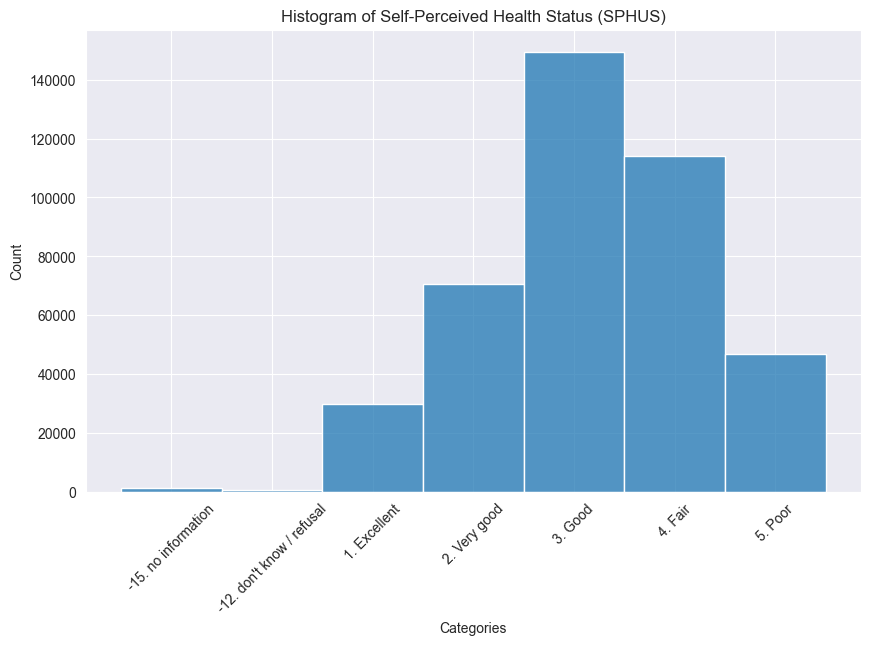

In [18]:
# histo
plt.figure(figsize=(10, 6))
sns.histplot(df['sphus'], discrete=True)
plt.title('Histogram of Self-Perceived Health Status (SPHUS)')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

In [22]:
observations_per_wave = df['wave'].value_counts()
print(observations_per_wave)

wave
7    77202
6    68085
5    66065
4    58000
8    46733
2    37143
1    30419
3    28463
Name: count, dtype: int64


In [23]:
df_sorted = df.sort_values(by=['mergeid', 'wave'], ascending=[True, False])
df_most_recent_wave_per_id = df_sorted.drop_duplicates(subset='mergeid', keep='first')

In [24]:
 df_most_recent_wave_per_id

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
6,AT-000674-01,AT-000674-A,,6,456,1. Longitudinal questionnaire,2015,6. June,11. Austria,40. Austria,...,34.005589,31.472639,35.184925,36.778969,4.499215,0.168908,0.001749,345.244644,-0.222259,345.244644
11,AT-001215-01,AT-001215-A,,8,45678,1. Longitudinal questionnaire,2020,1. January,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AT-001492-01,AT-001492-A,AT-001492-01-02,8,45678,1. Longitudinal questionnaire,2020,2. February,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412103,SK-995042-01,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412105,SK-995042-02,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412107,SK-996004-01,SK-996004-A,,8,78,0. Baseline questionnaire,2020,2. February,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412108,SK-999958-01,SK-999958-A,SK-999958-01-02,7,7,0. Baseline questionnaire,2017,8. August,63. Slovakia,703. Slovakia,...,22.639585,23.258799,21.059399,36.957790,9.795322,9.315717,6.441623,345.244644,15.017466,345.244644


In [25]:
import pandas as pd

In [26]:
data = {
    'mergeid': ['id1', 'id1', 'id2', 'id2', 'id3', 'id3'],
    'wave': [1, 2, 1, 3, 2, 4],
    'sphus': ['good', 'very good', 'fair', 'poor', 'excellent', 'fair'],
    # Include other columns as needed
}

In [27]:
df = pd.DataFrame(data)

In [29]:
df_sorted = df.sort_values(by=['mergeid', 'wave'], ascending=[True, False])

In [30]:
df_most_recent_wave_per_mergeid = df_sorted.drop_duplicates(subset='mergeid', keep='first')

df_most_recent_wave_per_mergeid

,mergeid,wave,sphus
1,id1,2,very good
3,id2,3,poor
5,id3,4,fair


In [31]:
sphus_mapping = {
    'excellent': 1,
    'very good': 2,
    'good': 3,
    'fair': 4,
    'poor': 5
}

In [32]:
df_most_recent_wave_per_mergeid['sphus'] = df_most_recent_wave_per_mergeid['sphus'].replace(sphus_mapping)

/var/folders/jr/55yqw22n1_n4th6my741s7g00000gn/T/ipykernel_28265/4028835826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_most_recent_wave_per_mergeid['sphus'] = df_most_recent_wave_per_mergeid['sphus'].replace(sphus_mapping)
/var/folders/jr/55yqw22n1_n4th6my741s7g00000gn/T/ipykernel_28265/4028835826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_recent_wave_per_mergeid['sphus'] = df_most_recent_wave_per_mergeid['sphus'].replace(sphus_mapping)


In [33]:
df_most_recent_wave_per_mergeid

,mergeid,wave,sphus
1,id1,2,2
3,id2,3,5
5,id3,4,4
